In [ ]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw03.ok')

# Homework 3: Table Manipulation and Visualization

**Helpful Resource:**
- [Python Reference](https://math-121-spring-21.github.io/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Reading**: 
* [Visualization](https://www.inferentialthinking.com/chapters/07/visualization.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!



### **Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw03.ok')

Assignment: Homework 3: Table Manipulation and Visualization
OK, version v1.18.1



Before continuing the assignment, execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

In [2]:
_ = ok.submit()

## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

<!--
BEGIN QUESTION
name: q1_1
-->

In [3]:
unemployment = ...
unemployment

In [ ]:
ok.grade("q1_1");

**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

<!--
BEGIN QUESTION
name: q1_2
-->

In [5]:
by_nei = ...
by_nei_pter = ...

In [ ]:
ok.grade("q1_2");

In [8]:
# Run this cell to check your by_nei table. You do not need to change the code.
by_nei.show(5)

In [9]:
# Run this cell to check your by_nei_pter table. You do not need to change the code.
by_nei_pter.show(5)

**Question 3.** Use `take` to make a table containing the data for the 11 quarters when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter.

<!--
BEGIN QUESTION
name: q1_3
-->

In [10]:
greatest_nei = ...
greatest_nei

In [ ]:
ok.grade("q1_3");

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (included in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

<!--
BEGIN QUESTION
name: q1_4
-->

In [13]:
pter = ...
pter

In [ ]:
ok.grade("q1_4");

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

<!--
BEGIN QUESTION
name: q1_5
-->

In [16]:
by_pter = ...
by_pter

In [ ]:
ok.grade("q1_5");

**Question 6.** 

Create a line plot of the PTER over time. 

To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

The order of the columns matter for our correctness tests, so be sure `Year` comes before `PTER`.

<!--
BEGIN QUESTION
name: q1_6
-->

In [18]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = ...
...

In [ ]:
ok.grade("q1_6");

**Question 7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

<!--
BEGIN QUESTION
name: q1_7
-->

In [23]:
highPTER = ...

In [ ]:
ok.grade("q1_7");

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2018 and July 1, 2019. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/).

If you want to read more about the different column descriptions, click [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)!

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [6]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2019-alldata.csv').where('SUMLEV', 40).select("REGION", "NAME", "POPESTIMATE2018", "POPESTIMATE2019", "BIRTHS2019", "DEATHS2019", 'NETMIG2019','RESIDUAL2019')
pop = pop.relabeled('POPESTIMATE2018', '2018').relabeled('POPESTIMATE2019', '2019')
pop = pop.relabeled('BIRTHS2019', 'BIRTHS').relabeled('DEATHS2019', 'DEATHS')
pop = pop.relabeled('NETMIG2019', 'MIGRATION').relabeled('RESIDUAL2019', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2018,2019,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,887,681","4,903,185","57,313","53,879","12,159",-89
4,Alaska,"735,139","731,545","10,031","4,819","-8,823",17
4,Arizona,"7,158,024","7,278,717","81,942","60,523","98,799",475
3,Arkansas,"3,009,733","3,017,804","36,640","31,322","2,783",-30
4,California,"39,461,588","39,512,223","462,617","282,520","-129,386",-76


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

<!--
BEGIN QUESTION
name: q2_1
-->

In [27]:
us_birth_rate = ...
us_birth_rate

In [8]:
us_birth_rate = sum(pop.column("BIRTHS")) / sum(pop.column("2018"))
us_birth_rate

0.011559143073034657

In [9]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

<!--
BEGIN QUESTION
name: q2_2
-->

In [30]:
migration_rates = ...
movers = ...
movers

In [11]:
migration_rates = pop.with_column("Migration Rate", np.abs(pop.column("MIGRATION")/pop.column("2018")))
movers = migration_rates.where("Migration Rate", are.above(0.01)).num_rows
movers

6

In [12]:
ok.grade("q2_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column, and appropriately filter (i.e. the types must match!).

<!--
BEGIN QUESTION
name: q2_3
-->

In [33]:
west_births = ...
west_births

In [15]:
west_births = np.sum(pop.where("REGION", 4).column("BIRTHS"))
west_births

915385

In [16]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Assign `less_than_west_births` to the number of states that had a total population in 2019 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.

<!--
BEGIN QUESTION
name: q2_4
-->

In [17]:
less_than_west_births = pop.where("2019", are.below(west_births)).num_rows
less_than_west_births

6

In [18]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Bar Chart
<br>
3. Scatter Plot

Assign `visualization` below to the number corresponding to the correct visualization.

<!--
BEGIN QUESTION
name: q2_5
-->

In [39]:
visualization = ...

In [ ]:
ok.grade("q2_5");

**Question 6.** 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->
<!-- EXPORT TO PDF -->

In [43]:
# Generate your chart in this cell
...

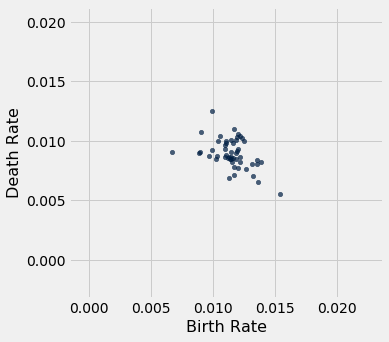

In [23]:
# Generate your chart in this cell
birth_death_rates = Table().with_columns(
    "Birth Rate", pop.column("BIRTHS")/pop.column("2018"),
    "Death Rate", pop.column("DEATHS")/pop.column("2018")
)
birth_death_rates.scatter("Birth Rate", "Death Rate")

**Question 7.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. 

<!--
BEGIN QUESTION
name: q2_7
-->

In [44]:
assoc = ...

In [ ]:
ok.grade("q2_7");

## 3. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given three histograms -- one corresponds to column `x`, one corresponds to column `y`, and one does not correspond to either column. 

**Histogram A:** ![](var3.png)
**Histogram B:** ![](var1.png)
**Histogram C:** ![](var2.png)

**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1, 2, or 3.

1. Histogram A
2. Histogram B
3. Histogram C

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [47]:
histogram_column_x = ...

In [ ]:
ok.grade("q3_1");

**Question 2.** State at least one reason why you chose the histogram from Question 1. **Make sure to indicate which histogram you selected** (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? `Assign histogram_column_y` to either 1, 2, or 3.

1. Histogram A
2. Histogram B
3. Histogram C

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [51]:
histogram_column_y = ...

In [ ]:
ok.grade("q3_3");

**Question 4.** State at least one reason why you chose the histogram from Question 3.  **Make sure to indicate which histogram you selected** (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 4. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [55]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

**Question 1.** Produce histograms of all ride times in Boston using the given bins. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->
<!-- EXPORT TO PDF -->

In [56]:
equal_bins = np.arange(0, 120, 5)
...

**Question 2.** Now, produce histograms of all ride times in Manila using the given bins.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->
<!-- EXPORT TO PDF -->

In [57]:
equal_bins = np.arange(0, 120, 5)
...

# Don't delete the following line!
plots.ylim(0, 0.05)

**Question 3.** Assign `boston_under_15` and `manila_under_15` to the percentage of rides that are less than 15 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should not access the tables boston and manila in any way.

<!--
BEGIN QUESTION
name: q4_3
manual: false
-->

In [58]:
boston_under_5_height = 1.2
manila_under_5_height = 0.6
boston_5_to_under_10_height = 3.2
manila_5_to_under_10_height = 1.4
boston_10_to_under_15_height = 4.9
manila_10_to_under_15_height = 2.2

boston_under_15 = ...
manila_under_15 = ...

boston_under_15, manila_under_15

In [ ]:
ok.grade("q4_3");

**Question 4.** Let's take a closer look at the distribution of ride times in Boston. Assign `boston_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time 

1: 0-8 minutes  
2: 8-14 minutes  
3: 14-20 minutes  
4: 20-40 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [63]:
boston_median_bin = ...
boston_median_bin

In [ ]:
ok.grade("q4_4");

**Question 5.** What is the main difference between the two histograms? What might be causing this?

**Hint:** Try thinking about external factors of the two cities that may be causing the difference!

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 5. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [66]:
_ = ok.submit()

In [67]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")